Installing Required Libraries

In [5]:
# /content/drive/MyDrive/realvsfakeus

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
!pip install tensorflow

In [3]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

Setting the image fixed size for training and intializing the batch size, channel and number of epochs

In [4]:

Image_Size= 256
Batch_Size = 32
Channels=3
Epochs=55

Determining number of pics and classes


In [7]:

imgdata = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/realvsfakeus",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size

)

Found 2040 files belonging to 2 classes.


In [8]:

class_names = imgdata.class_names
class_names  # 0 means fake and 1 means real

['fake', 'real']

The below code iterates over the first batch of data from the dataset.

In [9]:

for image_batch, label_batch in imgdata.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1]


Displaying our first image

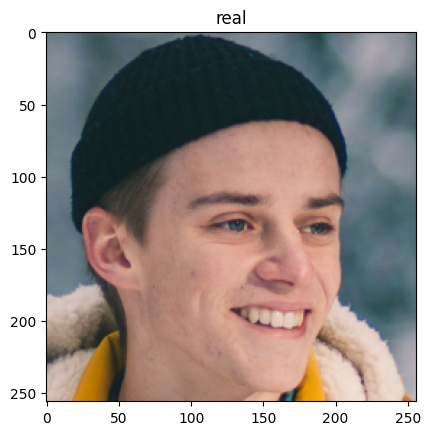

In [10]:

for image_batch, label_batch in imgdata.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

Function to create dataset

In [11]:

def splitting_dataset_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split * ds_size)
    val_size= int(val_split * ds_size)

    train_ds= ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [12]:

train_ds, val_ds, test_ds=splitting_dataset_tf(imgdata)


In [13]:

print(len(train_ds),len(val_ds),len(test_ds))


51 6 7


Pipeline for Optimization for Training, Validation, and Testing Datasets

In [14]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Image Preprocessing for Resizing and Rescaling

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

Data augmentation


In [16]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

Architecture of the model


In [17]:
input_shape = (Batch_Size,Image_Size, Image_Size,Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation= 'softmax'),

])

model.build(input_shape=input_shape)

Compiling the model with loss function and optimizer


In [18]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Model Training with Training and Validation Data

In [19]:
history = model.fit(
    train_ds,
    epochs=275,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/275
51/51 [==============================] - 270s 82ms/step - loss: 0.7219 - accuracy: 0.5074 - val_loss: 0.6968 - val_accuracy: 0.4730
Epoch 2/275
51/51 [==============================] - 4s 85ms/step - loss: 0.7041 - accuracy: 0.5116 - val_loss: 0.6943 - val_accuracy: 0.5325
Epoch 3/275
51/51 [==============================] - 4s 80ms/step - loss: 0.6948 - accuracy: 0.5221 - val_loss: 0.6989 - val_accuracy: 0.5325
Epoch 4/275
51/51 [==============================] - 4s 80ms/step - loss: 0.6959 - accuracy: 0.5055 - val_loss: 0.6945 - val_accuracy: 0.4706
Epoch 5/275
51/51 [==============================] - 4s 81ms/step - loss: 0.6937 - accuracy: 0.5208 - val_loss: 0.6917 - val_accuracy: 0.5325
Epoch 6/275
51/51 [==============================] - 4s 78ms/step - loss: 0.6915 - accuracy: 0.5135 - val_loss: 0.7062 - val_accuracy: 0.5325
Epoch 7/275
51/51 [==============================] - 4s 78ms/step - loss: 0.6964 - accuracy: 0.5276 - val_loss: 0.6941 - val_accuracy: 0.5325
Epoc

checking the accuracy of the model

In [20]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 1s 21ms/step - loss: 0.2348 - accuracy: 0.9087


predicting labels for the batch of images

first image to predict
Actual label :  real
1/1 [==============================] - 0s 239ms/step
Pred label :  real


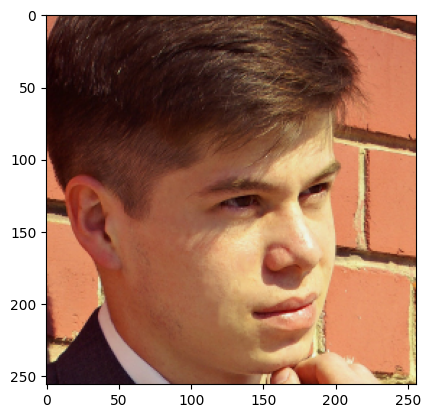

In [21]:
import numpy as np

for image_batch, label_batch in imgdata.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label : ",class_names[first_label])


    batch_pred = model.predict(image_batch)
    print("Pred label : ",class_names[np.argmax(batch_pred[0])])

image prediction function using the model


In [22]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence+
    

Displaying Sample Predictions with Confidence

1/1 [==============================] - 0s 17ms/step


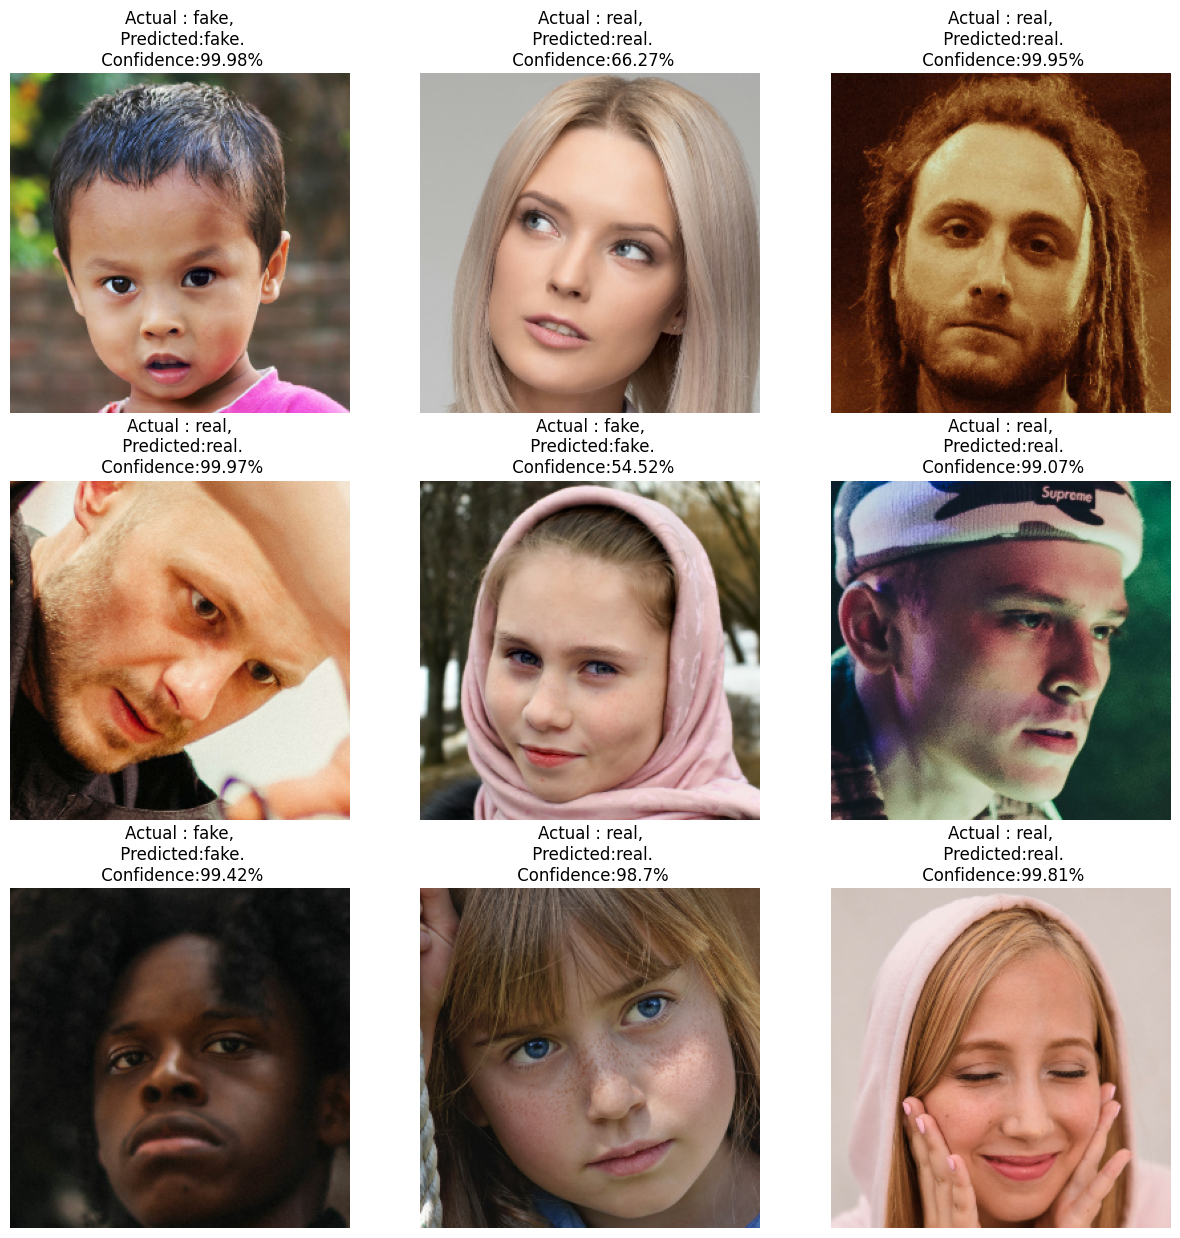

In [23]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = pred(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")

        plt.axis("off")

saving the model

In [24]:
import pickle

with open('model_f_real_pickle_final','wb') as f:
  pickle.dump(model,f)

In [25]:
# to run the pickle(saved model)
# import pickle

with open('model_f_real_pickle_final','rb') as f:
  model_saved = pickle.load(f)

#to predict the model
#model_saved.predict("give input")

1/1 [==============================] - 0s 18ms/step


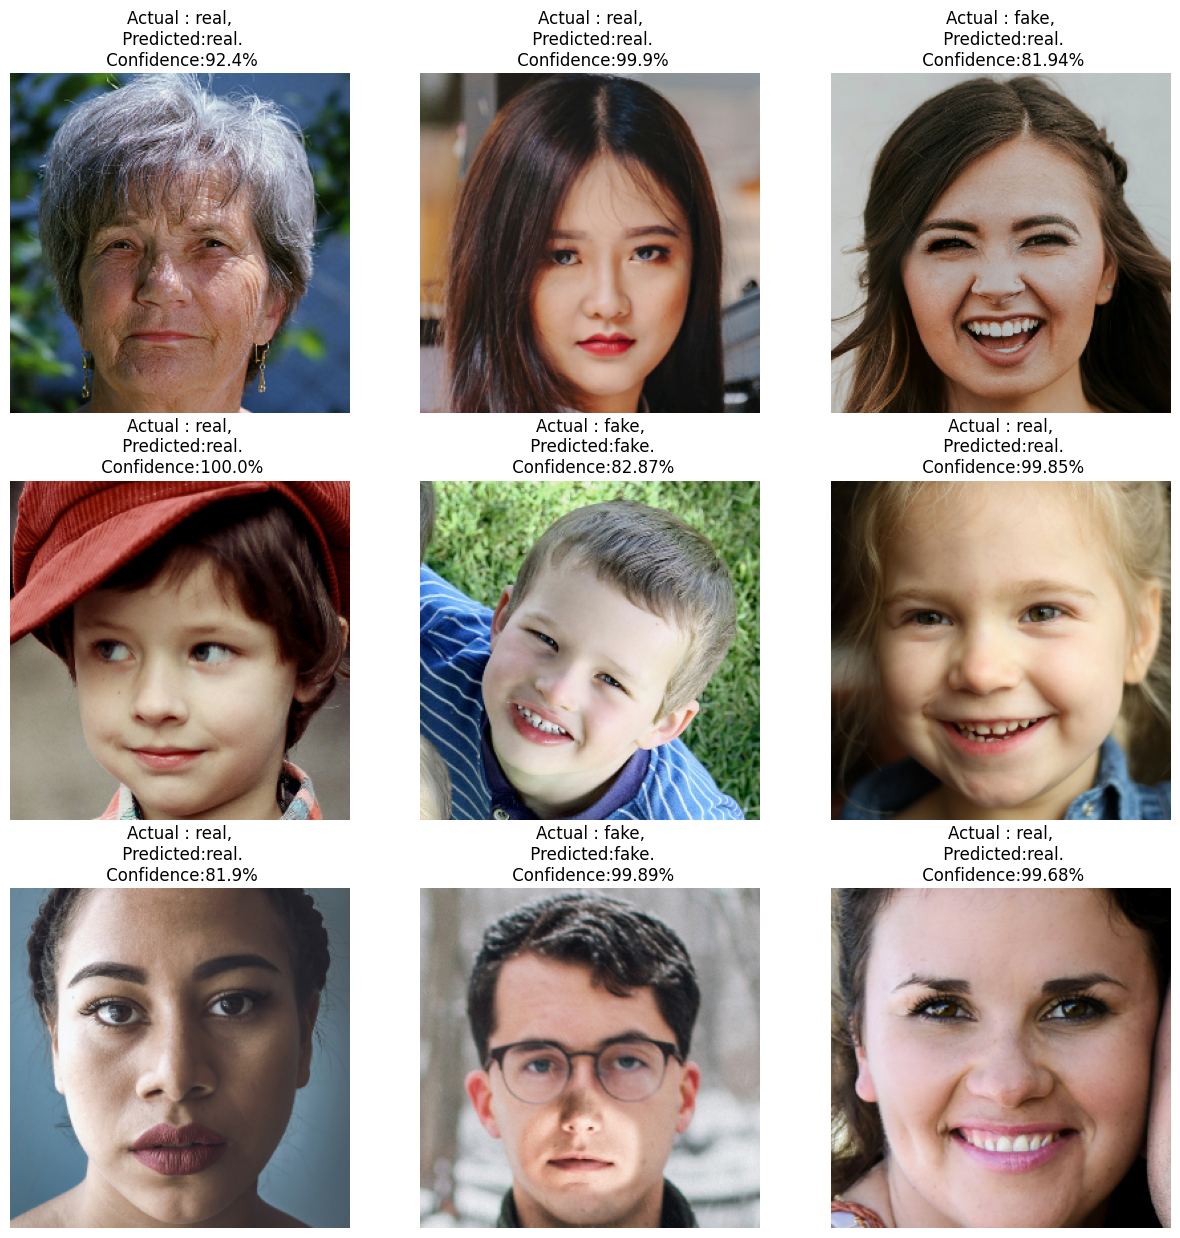

In [26]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = pred(model_saved, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")

        plt.axis("off")